# EDA Summary (Group 4)
in this EDA we tried to solve the following Questions
### Question 5
Distribution of properties per city (we need to know which cities we can make prediction for)
### Question 9b
Explore the price over building type (shop/ apartment/...)



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [570]:
data = pd.read_csv("merged_datasets.csv")

C:\Users\Prince\AppData\Local\Temp\ipykernel_3840\228374165.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("merged_datasets.csv")


In [571]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33703 entries, 0 to 33702
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  33703 non-null  int64  
 1   area                                   33703 non-null  float64
 2   building_type                          33703 non-null  object 
 3   building_nature                        33703 non-null  object 
 4   image_url                              17265 non-null  object 
 5   num_bath_rooms                         33703 non-null  float64
 6   num_bed_rooms                          33703 non-null  float64
 7   price                                  33703 non-null  float64
 8   property_description                   19029 non-null  object 
 9   property_overview                      18509 non-null  object 
 10  property_url                           33679 non-null  object 
 11  pu

## Data wrangling
Column: building_type


In [458]:
data["building_type"].unique()

array(['Apartment', 'Shop', 'Floor', 'Office', 'Building', 'Plot',
       'Duplex', 'Warehouse', 'Factory', 'Apartment/Flats',
       'Office space', 'Duplex Home', 'Showroom / Shop / Restaurant',
       'Independent House', 'House', 'Commerical - Other',
       'Apartment, Commercial', 'Showroom/Shop/Restaurant',
       'Office Space', 'Residential Plot', 'Industrial Space',
       'Commercial Plot', 'Land Sharing Flat', 'Sublet/Room'],
      dtype=object)

<Axes: ylabel='building_type'>

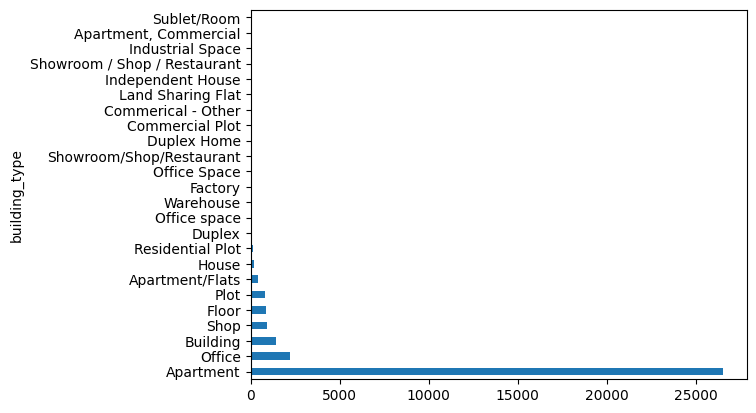

In [459]:
data["building_type"].value_counts().plot(kind='barh')

In [ ]:
len(data[data["building_type"].str.contains("Apartment")].building_type.index) ,len(data[data["building_type"] =="Apartment"].building_type.index) 

Combining similar types to a singular type


In [461]:
data["building_type"].value_counts()

building_type
Apartment                       26524
Office                           2210
Building                         1412
Shop                              946
Floor                             880
Plot                              791
Apartment/Flats                   416
House                             172
Residential Plot                  133
Duplex                             77
Office space                       41
Warehouse                          29
Factory                            19
Office Space                       15
Showroom/Shop/Restaurant            8
Duplex Home                         7
Commercial Plot                     5
Commerical - Other                  4
Land Sharing Flat                   4
Independent House                   3
Showroom / Shop / Restaurant        2
Industrial Space                    2
Apartment, Commercial               2
Sublet/Room                         1
Name: count, dtype: int64

In [462]:
# creating a new column
data["new_building_type"] = data["building_type"]

In [463]:
data["new_building_type"].value_counts()

new_building_type
Apartment                       26524
Office                           2210
Building                         1412
Shop                              946
Floor                             880
Plot                              791
Apartment/Flats                   416
House                             172
Residential Plot                  133
Duplex                             77
Office space                       41
Warehouse                          29
Factory                            19
Office Space                       15
Showroom/Shop/Restaurant            8
Duplex Home                         7
Commercial Plot                     5
Commerical - Other                  4
Land Sharing Flat                   4
Independent House                   3
Showroom / Shop / Restaurant        2
Industrial Space                    2
Apartment, Commercial               2
Sublet/Room                         1
Name: count, dtype: int64

In [464]:
# The following attributes are combined 
#
# Apartment - 'Apartment', 'Apartment/Flats', 'Apartment,Commercial'
# Office - 'Office', 'Office Space', 'Office space'
# Shop - 'Shop', 'Showroom / Shop / Restaurant', 'Showroom/Shop/Restaurant'
# Plot - 'Commercial Plot', 'Plot', 'Residential Plot'
# Commercial - 'Commercial - Other'
# House - 'House', 'Independent House'
# Duplex - 'Duplex', 'Duplex Home'

apat_vals = data[data["building_type"].str.contains("Apartment")].building_type
office_vals = data[data["building_type"].str.contains("Office")].building_type
shop_vals = data[data["building_type"].str.contains("Shop")].building_type
plot_vals = data[data["building_type"].str.contains("Plot")].building_type
commercial_vals = data[data["building_type"].str.contains("Commercial")].building_type
house_vals = data[data["building_type"].str.contains("House")].building_type
duplex_vals = data[data["building_type"].str.contains("Duplex")].building_type


    

data["new_building_type"].replace(set(apat_vals),value = "Apartment",inplace = True)
data["new_building_type"].replace(set(office_vals),value = "Office",inplace = True)
data["new_building_type"].replace(set(shop_vals),value = "Shop",inplace = True)
data["new_building_type"].replace(set(plot_vals),value = "Plot",inplace = True)
data["new_building_type"].replace(set(commercial_vals),value = "Commercial",inplace = True)
data["new_building_type"].replace(set(house_vals),value = "House",inplace = True)
data["new_building_type"].replace(set(duplex_vals),value = "Duplex",inplace = True)

In [465]:
data["new_building_type"].unique()

array(['Apartment', 'Shop', 'Floor', 'Office', 'Building', 'Plot',
       'Duplex', 'Warehouse', 'Factory', 'House', 'Commerical - Other',
       'Industrial Space', 'Land Sharing Flat', 'Sublet/Room'],
      dtype=object)

In [466]:
data["new_building_type"].value_counts()

new_building_type
Apartment             26942
Office                 2266
Building               1412
Shop                    956
Plot                    929
Floor                   880
House                   175
Duplex                   84
Warehouse                29
Factory                  19
Commerical - Other        4
Land Sharing Flat         4
Industrial Space          2
Sublet/Room               1
Name: count, dtype: int64

In [467]:
data.head()

,index,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,...,id,garage,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,new_building_type
0,0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,...,bproperty-0,0.0,0,1,2,0,2,0,3,Apartment
1,1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,...,bproperty-1,0.0,0,2,0,0,3,0,4,Apartment
2,2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,...,bproperty-2,0.0,0,2,2,0,2,0,4,Apartment
3,3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,...,bproperty-3,0.0,0,1,2,0,3,0,3,Apartment
4,4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,...,bproperty-4,0.0,0,0,2,0,1,0,4,Apartment


Building_type with less than 100 propeties are grouped together into a single value

In [468]:
new_building_type  = data.groupby("new_building_type")["new_building_type"].agg("count")

In [469]:
building_type_less_100 = new_building_type[new_building_type < 100]

In [470]:
data["new_building_type"] = data["new_building_type"].apply(lambda i:"Other" if i in building_type_less_100 else i) 

In [471]:
data["new_building_type"].value_counts()

new_building_type
Apartment    26942
Office        2266
Building      1412
Shop           956
Plot           929
Floor          880
House          175
Other          143
Name: count, dtype: int64

# Question 9b
Explore the price over building type (shop/ apartment/...)

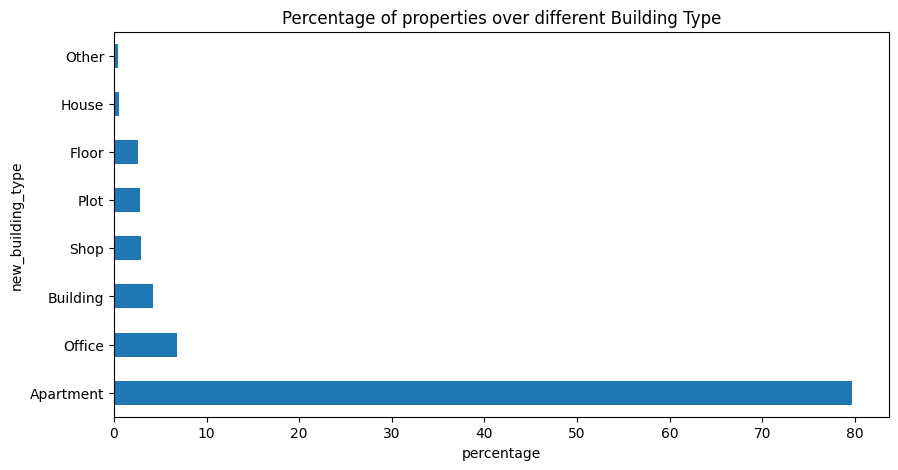

In [569]:
#getting the precentage of each building_type
percentage_building_type = (data["new_building_type"].value_counts()/ data["new_building_type"].value_counts().sum())*100
plt.subplots(figsize=(10, 5))
percentage_building_type.plot.barh()
plt.title("Percentage of properties over different Building Type")
plt.xlabel("percentage")
plt.show()

<Axes: >

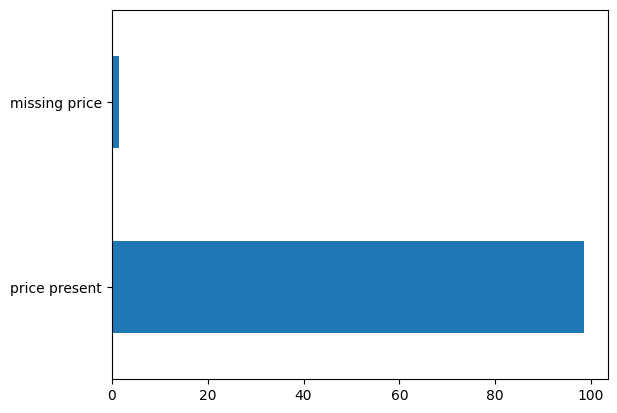

In [473]:
#Checking if there are any missing values
temp = pd.Series(np.where(data["price"]  <= 0,"missing price","price present"))
prct = (temp.value_counts()/temp.value_counts().sum())*100

prct.plot(kind = "barh")

In [474]:
missing_price = data.loc[data['price'] <= 0, 'price']
print(missing_price)

17603    0.0
32073    0.0
32177    0.0
32332    0.0
32347    0.0
        ... 
33633    0.0
33635    0.0
33642    0.0
33655    0.0
33656    0.0
Name: price, Length: 479, dtype: float64


In [475]:
#Removing all the values which have 0 in price sections
data = data[data['price'] != 0]
data

,index,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,...,id,garage,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,new_building_type
0,0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,...,bproperty-0,0.0,0,1,2,0,2,0,3,Apartment
1,1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,...,bproperty-1,0.0,0,2,0,0,3,0,4,Apartment
2,2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,...,bproperty-2,0.0,0,2,2,0,2,0,4,Apartment
3,3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,...,bproperty-3,0.0,0,1,2,0,3,0,3,Apartment
4,4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,...,bproperty-4,0.0,0,0,2,0,1,0,4,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33698,39113,8000.0,Office,Commercial,NaN,0.0,0.0,110.0,bd Office Rent Uttara Dhaka,Commercial Building for office rent Uttara,...,sharif-233,0.0,0,0,0,0,0,0,0,Office
33699,39115,10000.0,Office,Commercial,NaN,0.0,0.0,100.0,10000 sqf office rent at Uttara,10000 sqf office rent at Uttara,...,sharif-235,0.0,0,0,0,0,0,0,0,Office
33700,39116,5000.0,Office,Commercial,NaN,0.0,0.0,120.0,commercial space for rent in dhaka,commercial space for rent in dhaka,...,sharif-236,0.0,0,0,0,0,0,0,0,Office
33701,39143,10000.0,Office,Commercial,NaN,0.0,0.0,120.0,Commercial Space Rent at Tejgaon,Commercial Space Rent at Tejgaon,...,sharif-263,0.0,0,0,0,0,0,0,0,Office


In [476]:
# Verifying if there are any missing values.
missing_price = data.loc[data['price'] <= 0, 'price']
print(missing_price)

Series([], Name: price, dtype: float64)


<Axes: >

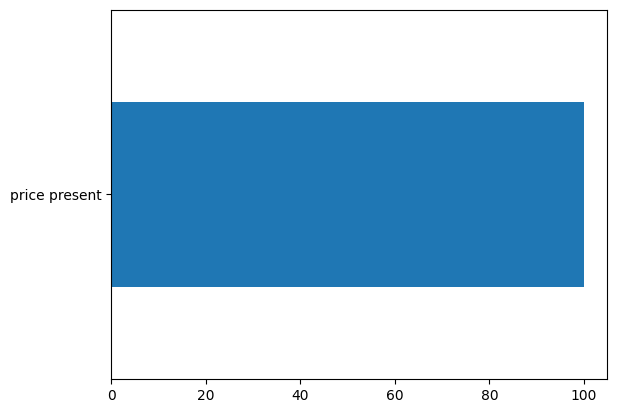

In [477]:
temp = pd.Series(np.where(data["price"]  <= 0,"missing price","price present"))
prct = (temp.value_counts()/temp.value_counts().sum())*100

prct.plot(kind = "barh")

In [478]:
#Using Z-score to see if there are any Outliers
z_score_price = data["price"]
mean = np.mean(z_score_price)
std_dev = np.std(z_score_price)
z_scores = (z_score_price - mean) / std_dev
print(z_scores)

0       -0.008133
1       -0.007961
2       -0.008122
3       -0.008028
4       -0.008097
           ...   
33698   -0.008179
33699   -0.008179
33700   -0.008179
33701   -0.008179
33702   -0.008179
Name: price, Length: 33224, dtype: float64


In [479]:
for i in z_scores:
    if i > 3 and i <-3:
        print(i)
    else:
        print("No Outliers")
    break

No Outliers


In [480]:
# Finding the aveerage price of each building type
avg_price  = data.groupby("new_building_type")["price"].agg("mean")
avg_price

new_building_type
Apartment    1.131420e+09
Building     8.659585e+07
Floor        4.954216e+06
House        3.406315e+10
Office       3.730475e+06
Other        1.398764e+07
Plot         2.280111e+07
Shop         2.490569e+06
Name: price, dtype: float64

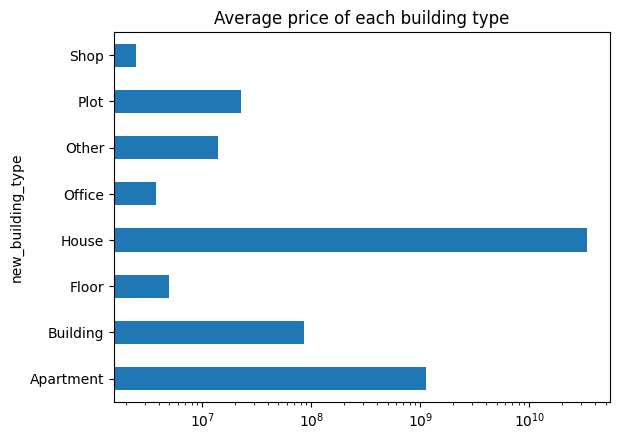

In [566]:

avg_price.plot(kind = "barh")
plt.title("Average price of each building type")
plt.xscale("log")

In [540]:
data["purpose"]

0        Sale
1        Sale
2        Sale
3        Sale
4        Sale
         ... 
33698    Rent
33699    Rent
33700    Rent
33701    Rent
33702    Rent
Name: purpose, Length: 33224, dtype: object

In [546]:
# finding  the average price of each bulding_type which has a purpose of Rent
avg_price_type = pd.DataFrame(data.groupby(["new_building_type","purpose"], as_index = False)["price"].agg("mean"))
price_rent = avg_price_type[avg_price_type["purpose"]== "Rent"]
price_rent

,new_building_type,purpose,price
0,Apartment,Rent,6.664571e+06
2,Building,Rent,8.760356e+07
4,Floor,Rent,4.798500e+05
6,House,Rent,3.014254e+05
8,Office,Rent,3.298344e+05
10,Other,Rent,2.673482e+05
12,Plot,Rent,2.630174e+05
14,Shop,Rent,2.787757e+05


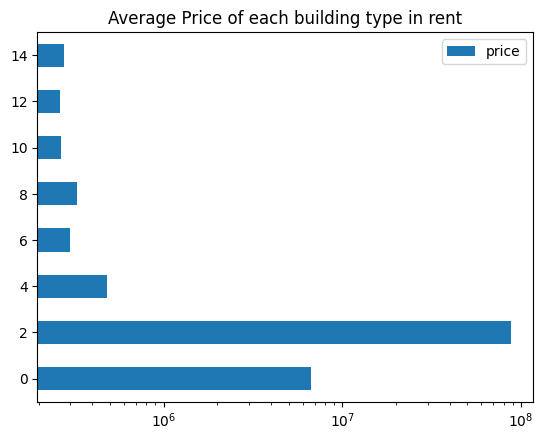

In [567]:
price_rent.plot(kind = "barh")
plt.title("Average Price of each building type in rent")
plt.xscale("log")

In [549]:
# finding  the average price of each bulding_type which has a purpose of Sale
price_sale = avg_price_type[avg_price_type["purpose"]== "Sale"]
price_sale

,new_building_type,purpose,price
1,Apartment,Sale,2.671390e+09
3,Building,Sale,7.466818e+07
5,Floor,Sale,5.032089e+07
7,House,Sale,1.216533e+11
9,Office,Sale,3.888182e+07
11,Other,Sale,4.386738e+07
13,Plot,Sale,2.352733e+07
15,Shop,Sale,5.289379e+06


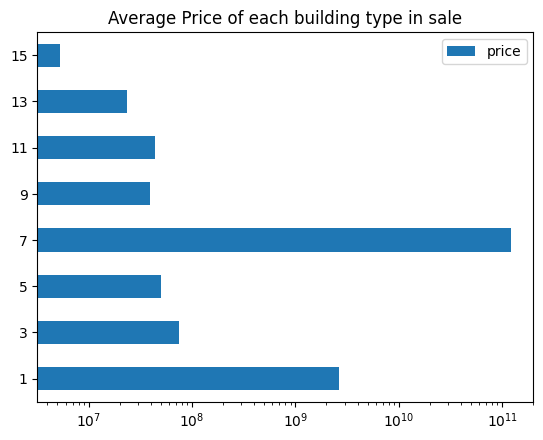

In [568]:
price_sale.plot(kind = "barh")
plt.title("Average Price of each building type in sale")
plt.xscale("log")

# Question 5
Distribution of properties per city (we need to know which cities we can make prediction for)

In [482]:
data["city"].unique()

array(['Dhaka', 'Chattogram', 'Narayanganj City', 'Gazipur', 'Sylhet',
       'Chittagong', 'Dinajpur', 'Rangpur', 'Kushtia', 'Bogura',
       'Barishal', 'Rajshahi', 'Thakurgaon', 'Manikganj', 'Khulna',
       'Barguna', 'Mymensingh', 'Faridpur', 'Narsingdi', 'Magura',
       'Jamalpur', 'Feni', 'Narayanganj', 'Madaripur', 'Jashore',
       'Noakhali', 'Cumilla', 'Nawabganj', 'Joypurhat', 'Tangail',
       'Moulvibazar', 'Kishoreganj', 'Chandpur', 'Habiganj', 'Bandarban',
       'Sherpur', 'Gopalganj', 'Naogaon', 'Brahmanbaria', 'Lakshmipur',
       'Nilphamari', 'Gaibandha', 'Sirajganj', 'Shariatpur'], dtype=object)

In [483]:
data["city"].value_counts()

city
Dhaka               28204
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Khulna                 39
Bogura                  8
Thakurgaon              8
Mymensingh              8
Cumilla                 5
Narsingdi               4
Magura                  4
Chittagong              4
Manikganj               4
Barguna                 4
Chandpur                3
Jashore                 3
Kushtia                 3
Moulvibazar             2
Nilphamari              2
Madaripur               2
Noakhali                2
Brahmanbaria            2
Tangail                 2
Naogaon                 1
Sirajganj               1
Lakshmipur              1
Sherpur                 1
Gaibandha               1
Gopalganj               1
Nawabganj               1
Bandarban               1
Habiganj                1
Kishore

As you can see there consists of so many cities which leads to overlapping and hence making the plot very dirty

<Axes: ylabel='city'>

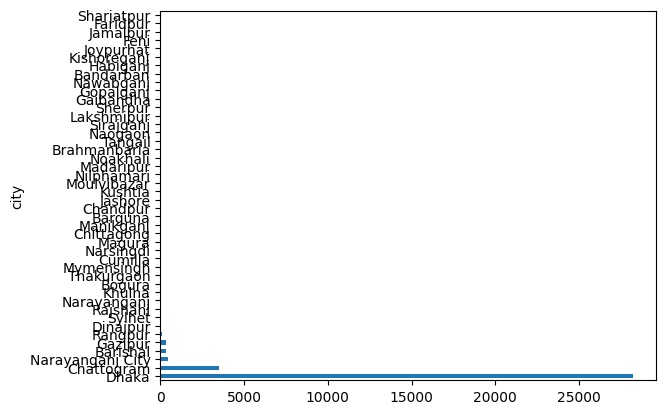

In [484]:
data['city'].value_counts().plot(kind='barh')

We can group together cities which have limited properties(less than 100 properties).

In [485]:
np.where(data["city"].value_counts() < 100)

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43], dtype=int64),)

In [486]:
data["city"].value_counts().dtypes

dtype('int64')

In [487]:
data["city"].value_counts().index

Index(['Dhaka', 'Chattogram', 'Narayanganj City', 'Barishal', 'Gazipur',
       'Rangpur', 'Dinajpur', 'Sylhet', 'Rajshahi', 'Narayanganj', 'Khulna',
       'Bogura', 'Thakurgaon', 'Mymensingh', 'Cumilla', 'Narsingdi', 'Magura',
       'Chittagong', 'Manikganj', 'Barguna', 'Chandpur', 'Jashore', 'Kushtia',
       'Moulvibazar', 'Nilphamari', 'Madaripur', 'Noakhali', 'Brahmanbaria',
       'Tangail', 'Naogaon', 'Sirajganj', 'Lakshmipur', 'Sherpur', 'Gaibandha',
       'Gopalganj', 'Nawabganj', 'Bandarban', 'Habiganj', 'Kishoreganj',
       'Joypurhat', 'Feni', 'Jamalpur', 'Faridpur', 'Shariatpur'],
      dtype='object', name='city')

In [488]:
city = data.groupby("city")["city"].agg("count") #We are using a groupby function to group all the cities with less than 100 properties

In [489]:
city_less_100 = city[city<100]

In [490]:
data["city"] = data["city"].apply(lambda i:"Other" if i in city_less_100 else i) #We are naming the group as "Other"

In [ ]:
data["city"].value_counts()

<Axes: ylabel='city'>

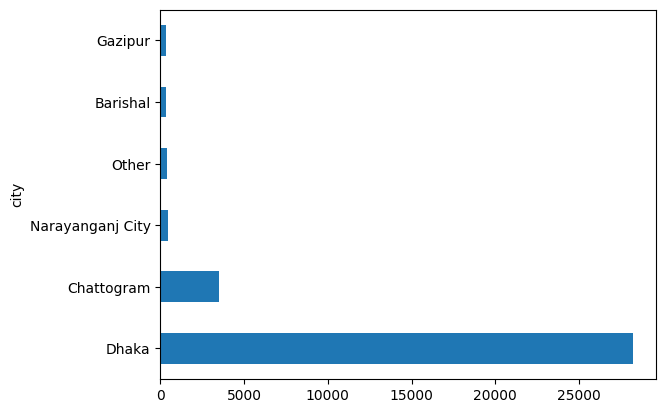

In [492]:
data['city'].value_counts().plot(kind='barh') #Using a plot called Barh to check the number of propertie per city


Using a Pie chart to check the percentage of properties in each city.

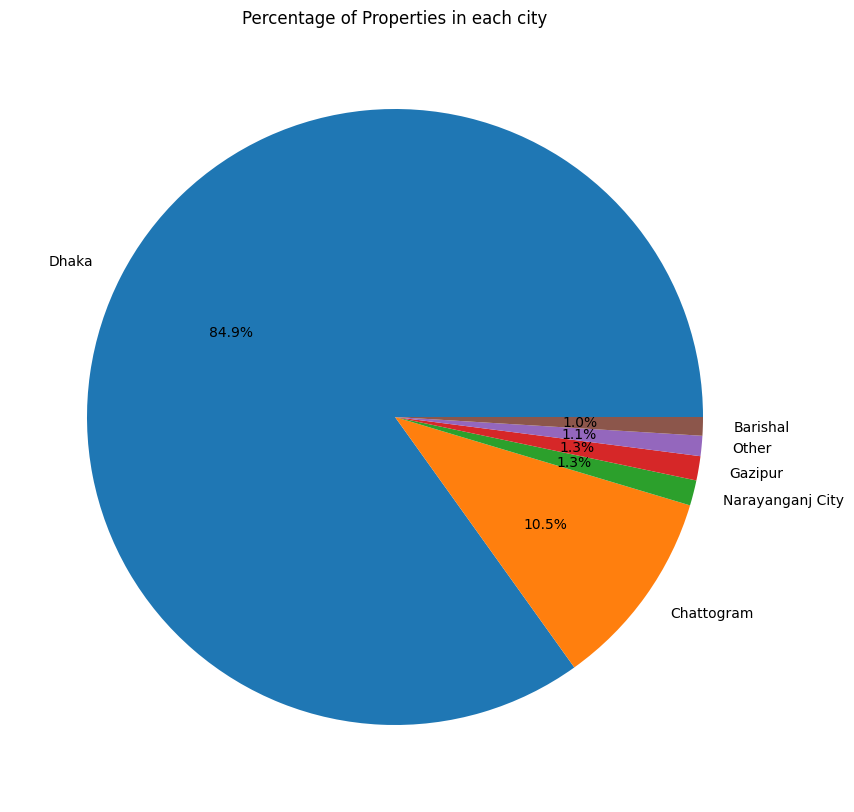

In [565]:
plt.figure(figsize = (20,10))
plt.title('Percentage of Properties in each city')
plt.pie(data["city"].value_counts(), labels = data["city"].unique(), autopct = "%2.1f%%")
plt.show()

Finally using a countplot to check which cities we can make predictions in the future.

<Axes: title={'center': 'Number of Properties in each city'}, xlabel='city', ylabel='count'>

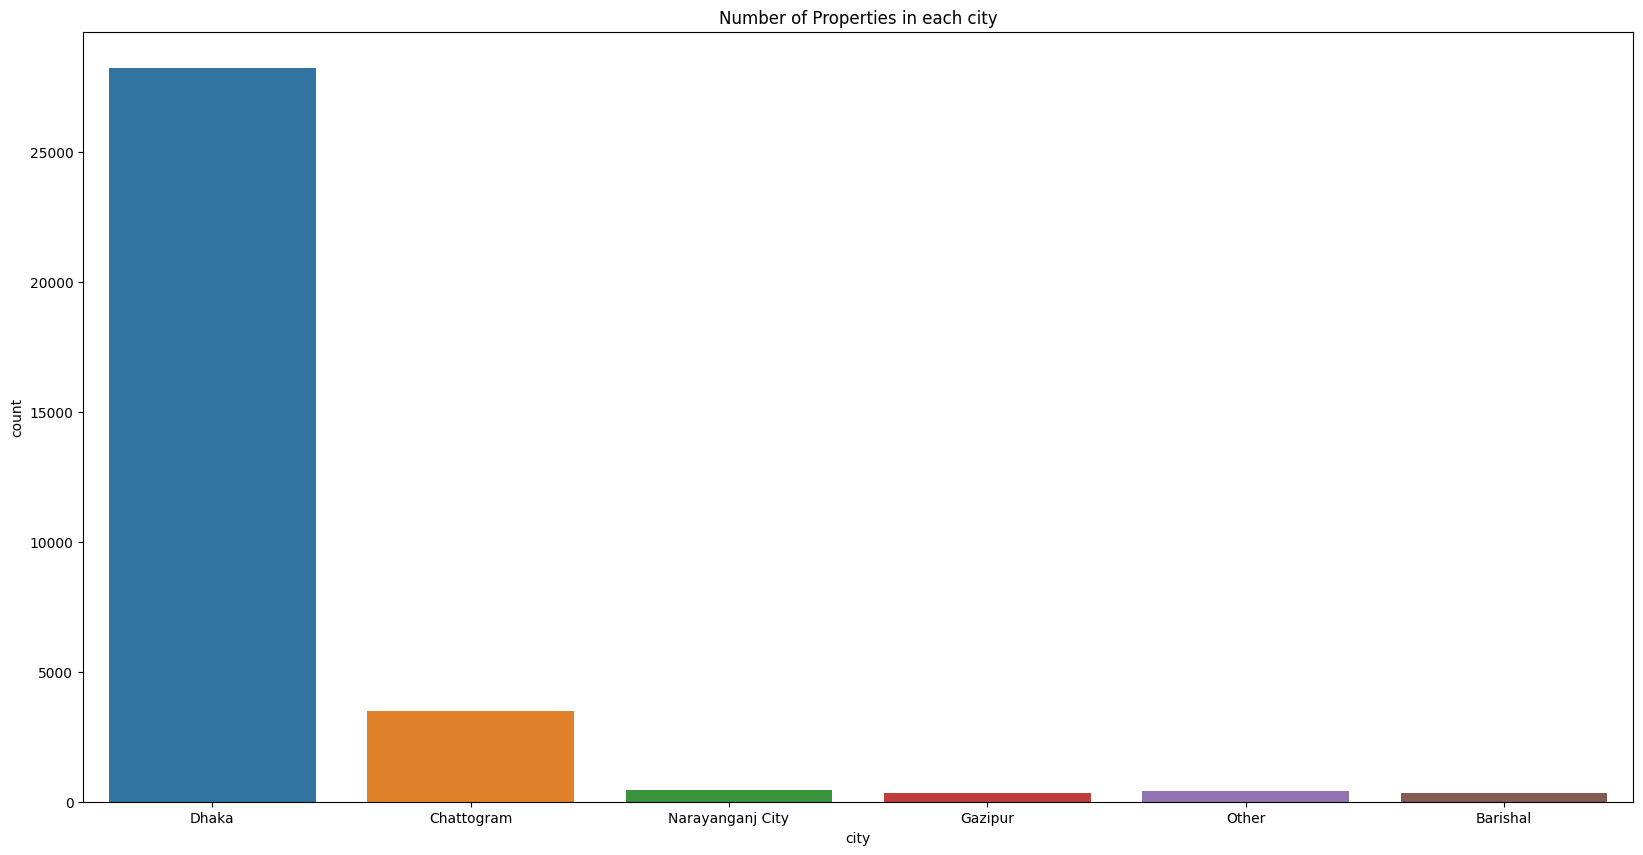

In [564]:
plt.figure(figsize = (20,10))
plt.title('Number of Properties in each city')
sns.countplot(x= data["city"])

### Checking the average property price of each city in the given new_building_type

In [552]:
 x = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_dhaka = x[x["city"]== "Dhaka"]

In [504]:
city_dhaka

,new_building_type,city,price
2,Apartment,Dhaka,1.287633e+09
8,Building,Dhaka,8.250335e+07
12,Floor,Dhaka,5.282550e+06
15,House,Dhaka,4.238118e+10
19,Office,Dhaka,3.539989e+06
22,Other,Dhaka,1.507649e+07
24,Plot,Dhaka,3.812230e+07
29,Shop,Dhaka,1.781855e+06


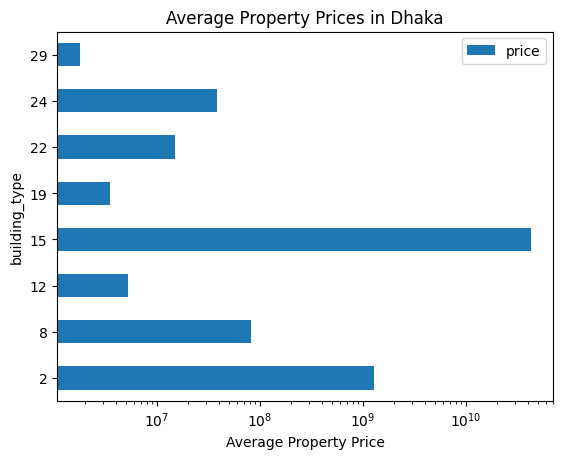

In [506]:
city_dhaka.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Dhaka')
plt.xscale("log")

In [538]:
 y = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_chattogram = x[x["city"]== "Chattogram"]
city_chattogram

,new_building_type,city,price
1,Apartment,Chattogram,6.598380e+06
7,Building,Chattogram,3.437367e+07
11,Floor,Chattogram,1.842857e+06
14,House,Chattogram,3.700367e+06
18,Office,Chattogram,4.231244e+06
21,Other,Chattogram,6.426167e+06
23,Plot,Chattogram,3.616332e+07
28,Shop,Chattogram,3.732430e+06


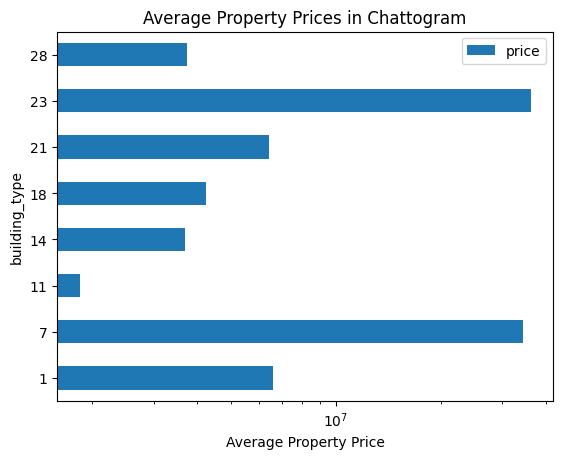

In [539]:
city_chattogram.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Chattogram')
plt.xscale("log")

In [525]:
 z = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_Narayanganj = x[x["city"]== "Narayanganj City"]

In [527]:
city_Narayanganj

,new_building_type,city,price
4,Apartment,Narayanganj City,6.800000e+06
26,Plot,Narayanganj City,6.024545e+06


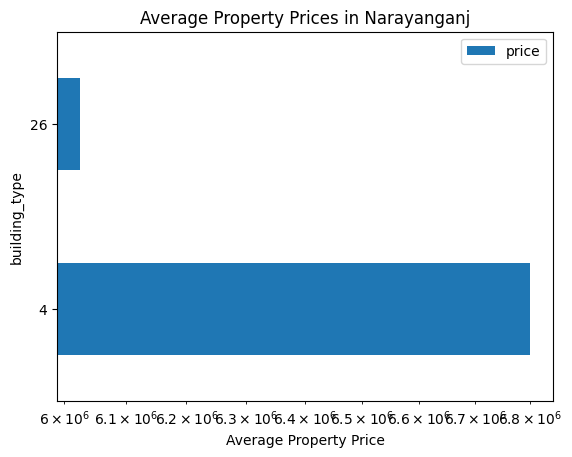

In [528]:
city_Narayanganj.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Narayanganj')
plt.xscale("log")

In [530]:
w = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_Gazipur = x[x["city"]== "Gazipur"]

,new_building_type,city,price
3,Apartment,Gazipur,2.770931e+06
9,Building,Gazipur,9.822534e+06
16,House,Gazipur,8.500000e+03
25,Plot,Gazipur,3.520000e+07
30,Shop,Gazipur,3.210196e+06


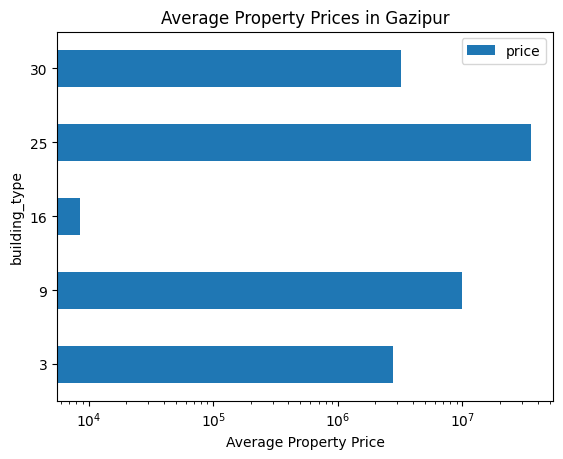

In [563]:
city_Gazipur.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Gazipur')
plt.xscale("log")

In [534]:
q = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_Barishal = x[x["city"]== "Barishal"]
city_Barishal

,new_building_type,city,price
0,Apartment,Barishal,7.226052e+03
6,Building,Barishal,5.645438e+06
13,House,Barishal,2.858750e+10
27,Shop,Barishal,5.487515e+05


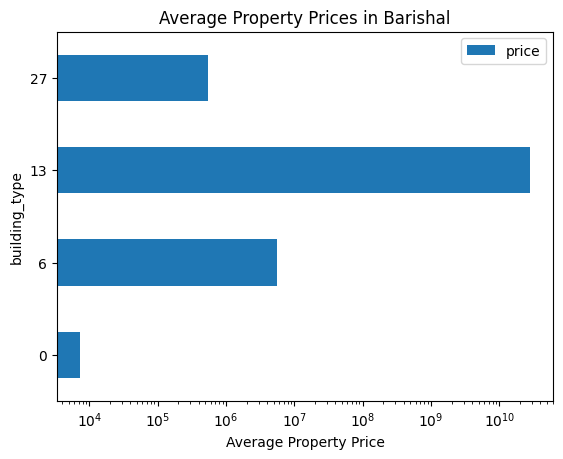

In [535]:
city_Barishal.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Barishal')
plt.xscale("log")

In [536]:
v = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_other = x[x["city"]== "Other"]
city_other

,new_building_type,city,price
5,Apartment,Other,1.856202e+08
10,Building,Other,3.897151e+08
17,House,Other,1.180222e+10
20,Office,Other,6.000000e+07
31,Shop,Other,4.095304e+05


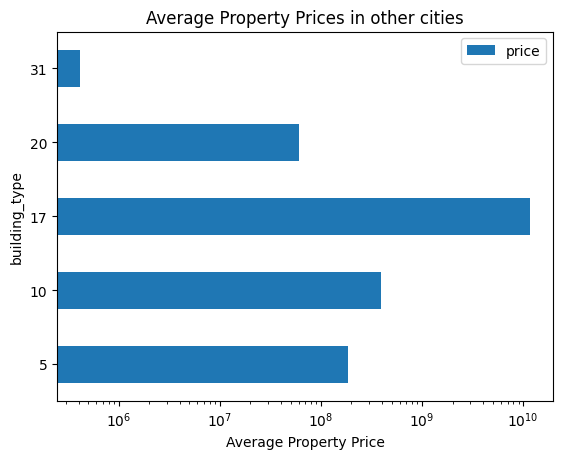

In [537]:
city_other.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in other cities')
plt.xscale("log")